In [1]:
from OpenQuakeUHS.core.folder_classifier import classify_csv_files
from OpenQuakeUHS.tools.uhs_plotter import plot_uhs_sets


from OpenQuakeUHS.core.spectrum_parser import UHSSpectrum
from OpenQuakeUHS.tools.uhs_table import generate_uhs_table


from OpenQuakeUHS.core.hazard_classifier import classify_hazard_files
from OpenQuakeUHS.tools.hazard_plotter import plot_mean_and_rlz_hazard_curves

from OpenQuakeUHS.core.disaggregation_calculator import Disaggregation

import os


## All UHS

In [2]:
poe_values=0.2
poe=0.02
# 0.687 , 0.50 , 0.2 , 0.1 , 0.02 

In [3]:
SVG_path=r'C:\Users\ppala\OneDrive\01. Brain\01. Consultorias\054. US Qondesa V2\11. AmenzaSísmica\100. data\imagesSVG'

Figures saved to C:\Users\ppala\OneDrive\01. Brain\01. Consultorias\054. US Qondesa V2\11. AmenzaSísmica\100. data\imagesSVG\UHS_linear.(svg/pdf) and C:\Users\ppala\OneDrive\01. Brain\01. Consultorias\054. US Qondesa V2\11. AmenzaSísmica\100. data\imagesSVG\UHS_log.(svg/pdf)


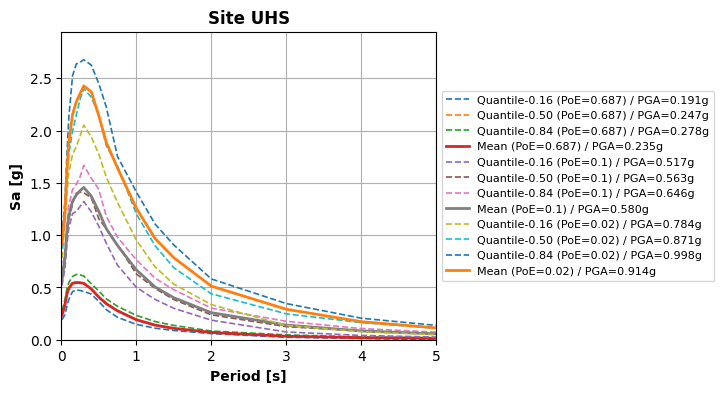

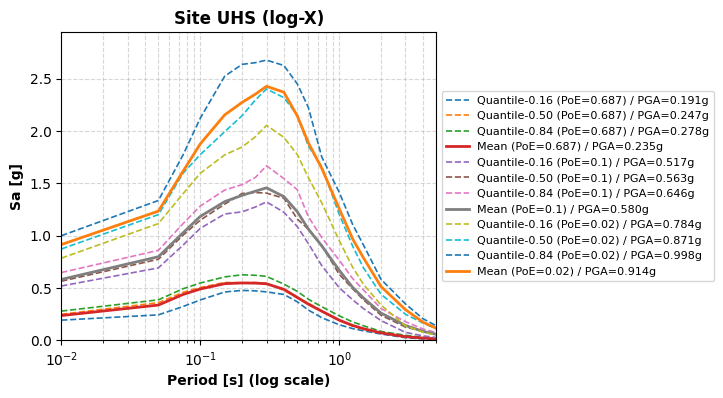

In [4]:
# mean, rlz, quantile = classify_csv_files(r"data\uhs")
mean, rlz, quantile = classify_csv_files(r'C:\Users\ppala\OneDrive\01. Brain\01. Consultorias\054. US Qondesa V2\11. AmenzaSísmica\100. data\uhs')


plot_uhs_sets(
    mean_files=mean,
    quantile_files=quantile,
    rlz_files=None,
    poe=[0.687 , 0.1 , 0.02 ],
    title="Site UHS",
    save_path = os.path.join(SVG_path, "UHS"),
)

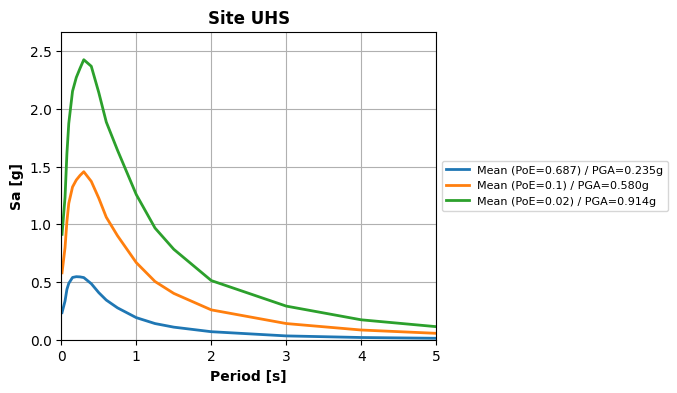

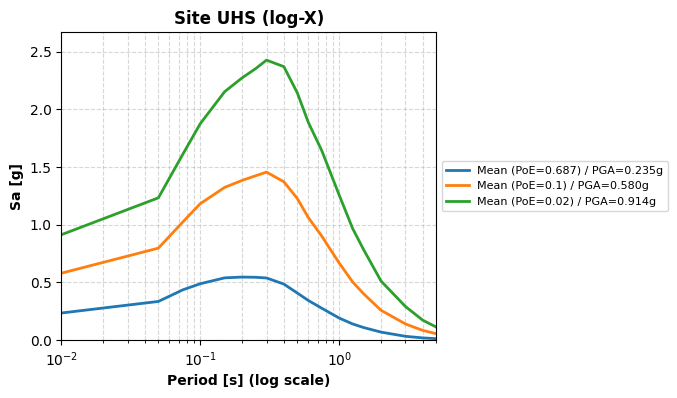

In [5]:
plot_uhs_sets(
    mean_files=mean,
    quantile_files=None,
    rlz_files=None,
    poe=[0.687 , 0.1 , 0.02],
    title="Site UHS"
)

In [6]:

table = generate_uhs_table(mean[0], quantile, poe=0.687)
print(table)

        T      mean       q16       q50       q84
0   0.010  0.234990  0.190933  0.247482  0.277576
1   0.050  0.335350  0.241469  0.358436  0.385374
2   0.075  0.436140  0.320497  0.456538  0.490675
3   0.100  0.488753  0.383961  0.503026  0.545847
4   0.150  0.539837  0.460395  0.551722  0.604545
5   0.200  0.546607  0.475493  0.548820  0.624604
6   0.250  0.544877  0.470937  0.550667  0.619952
7   0.300  0.538791  0.461203  0.543709  0.609518
8   0.400  0.485911  0.436863  0.476989  0.535496
9   0.500  0.408062  0.366250  0.406154  0.465994
10  0.600  0.343723  0.287743  0.354357  0.391085
11  0.750  0.276301  0.214204  0.278395  0.319356
12  1.000  0.191386  0.147056  0.188958  0.232801
13  1.250  0.140140  0.110365  0.134332  0.173941
14  1.500  0.109027  0.088584  0.103066  0.137066
15  2.000  0.069506  0.058669  0.069015  0.083473
16  3.000  0.033083  0.023206  0.033360  0.046344
17  4.000  0.019204  0.011971  0.022433  0.026796
18  5.000  0.012485  0.000000  0.015629  0.019032


## UHS

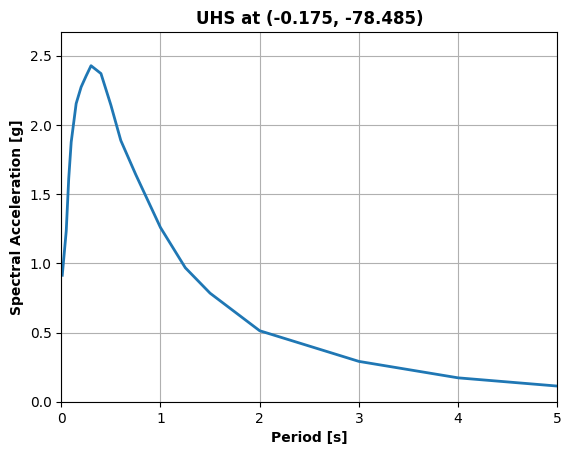

In [7]:
uhs = UHSSpectrum(mean[0])
uhs.plot(poe=poe)

## Hazard Curves


--- Interpolación Sa vs PoE ---
PGA: Sa interpolado para PoE=0.687 → 0.2463 g
PGA: Sa interpolado para PoE=0.100 → 0.6317 g
PGA: Sa interpolado para PoE=0.020 → 1.0005 g
SA(0.20): Sa interpolado para PoE=0.687 → 0.5574 g
SA(0.20): Sa interpolado para PoE=0.100 → 1.4420 g
SA(0.20): Sa interpolado para PoE=0.020 → 2.3725 g
SA(0.50): Sa interpolado para PoE=0.687 → 0.4170 g
SA(0.50): Sa interpolado para PoE=0.100 → 1.2332 g
SA(0.50): Sa interpolado para PoE=0.020 → 2.1775 g
SA(1.00): Sa interpolado para PoE=0.687 → 0.1946 g
SA(1.00): Sa interpolado para PoE=0.100 → 0.6754 g
SA(1.00): Sa interpolado para PoE=0.020 → 1.3047 g
SA(1.50): Sa interpolado para PoE=0.687 → 0.1109 g
SA(1.50): Sa interpolado para PoE=0.100 → 0.4116 g
SA(1.50): Sa interpolado para PoE=0.020 → 0.8084 g
SA(2.00): Sa interpolado para PoE=0.687 → 0.0697 g
SA(2.00): Sa interpolado para PoE=0.100 → 0.2650 g
SA(2.00): Sa interpolado para PoE=0.020 → 0.5223 g
SA(3.00): Sa interpolado para PoE=0.687 → 0.0336 g
SA(3.00): Sa 

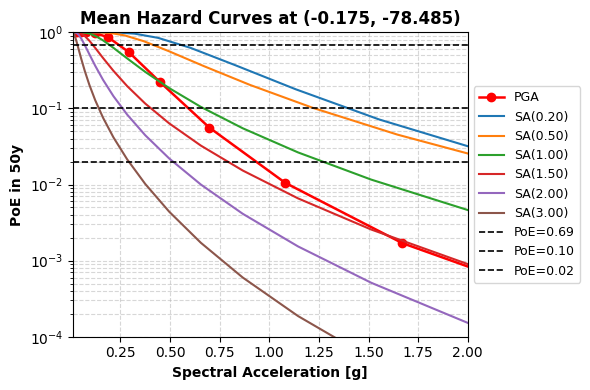


--- Interpolación Sa vs 1/Tr ---
PGA: Sa interpolado para 1/Tr=0.02296 (PoE=0.687) → 0.2594 g
PGA: Sa interpolado para 1/Tr=0.00210 (PoE=0.100) → 0.6361 g
PGA: Sa interpolado para 1/Tr=0.00040 (PoE=0.020) → 1.0019 g
SA(0.20): Sa interpolado para 1/Tr=0.02296 (PoE=0.687) → 0.5698 g
SA(0.20): Sa interpolado para 1/Tr=0.00210 (PoE=0.100) → 1.4468 g
SA(0.20): Sa interpolado para 1/Tr=0.00040 (PoE=0.020) → 2.3739 g
SA(0.50): Sa interpolado para 1/Tr=0.02296 (PoE=0.687) → 0.4266 g
SA(0.50): Sa interpolado para 1/Tr=0.00210 (PoE=0.100) → 1.2336 g
SA(0.50): Sa interpolado para 1/Tr=0.00040 (PoE=0.020) → 2.1781 g
SA(1.00): Sa interpolado para 1/Tr=0.02296 (PoE=0.687) → 0.1978 g
SA(1.00): Sa interpolado para 1/Tr=0.00210 (PoE=0.100) → 0.6758 g
SA(1.00): Sa interpolado para 1/Tr=0.00040 (PoE=0.020) → 1.3053 g
SA(1.50): Sa interpolado para 1/Tr=0.02296 (PoE=0.687) → 0.1127 g
SA(1.50): Sa interpolado para 1/Tr=0.00210 (PoE=0.100) → 0.4123 g
SA(1.50): Sa interpolado para 1/Tr=0.00040 (PoE=0.020) → 

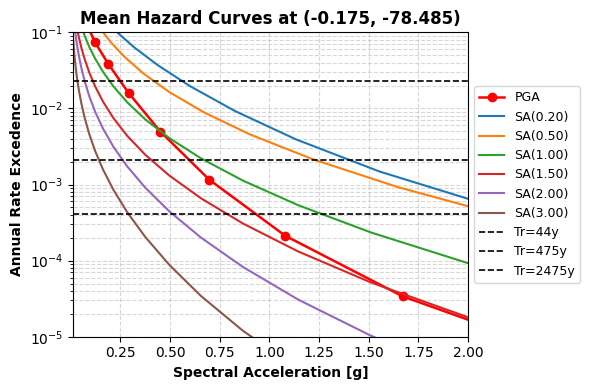

In [8]:
# mean_hc, rlz_hc, quantile_hc = classify_hazard_files(r"data\hazard_curves")
mean_hc, rlz_hc, quantile_hc = classify_hazard_files(r'C:\Users\ppala\OneDrive\01. Brain\01. Consultorias\054. US Qondesa V2\11. AmenzaSísmica\100. data\hazard_curves')
plot_mean_and_rlz_hazard_curves(mean_files=mean_hc, 
                                rlz_files=None, 
                                periods=[0.01 , 0.2 ,0.50, 1.0 , 1.5 , 2.0 , 3.0] ,
                                reference_value=[0.687 , 0.1 , 0.02], 
                                 save_path = os.path.join(SVG_path, "HC"), 
                                  )
# plot_mean_and_rlz_hazard_curves(mean_files=mean_hc, rlz_files=None, periods=[0.01 , 0.05, 0.075, 0.10, 0.15,  0.2 , 0.25, 0.30, 0.40, 0.50, 0.60,  0.75 , 1.0 ,1.25,  1.5 , 2.0 , 3.0, 4, 5] , reference_value=0.1)

# plot_mean_and_rlz_hazard_curves(mean_files=mean_hc, rlz_files=None, periods=[0.01 , 0.1, 0.2, 0.5 ,1 ,2,3])
# plot_mean_and_rlz_hazard_curves(mean_files=mean_hc, rlz_files=None, periods=[0.01 , 0.1, 0.2 , 0.5 , 1 ], reference_value=0.1)

## Disaggregation

C:\Users\ppala\OneDrive\01. Brain\11. GitHub\OpenQuakeUHS\src\OpenQuakeUHS\core\disaggregation_calculator.py:67: FutureWarning: The provided callable <function sum at 0x000001C6AD3BE0E0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  d01 = data01.pivot_table(values='hz_cont', index=['mag','dist'], columns='eps', aggfunc=np.sum, fill_value=0).reset_index()


Figures saved to C:\Users\ppala\OneDrive\01. Brain\01. Consultorias\054. US Qondesa V2\11. AmenzaSísmica\100. data\imagesSVG\DISS_disaggregation.(svg/pdf)


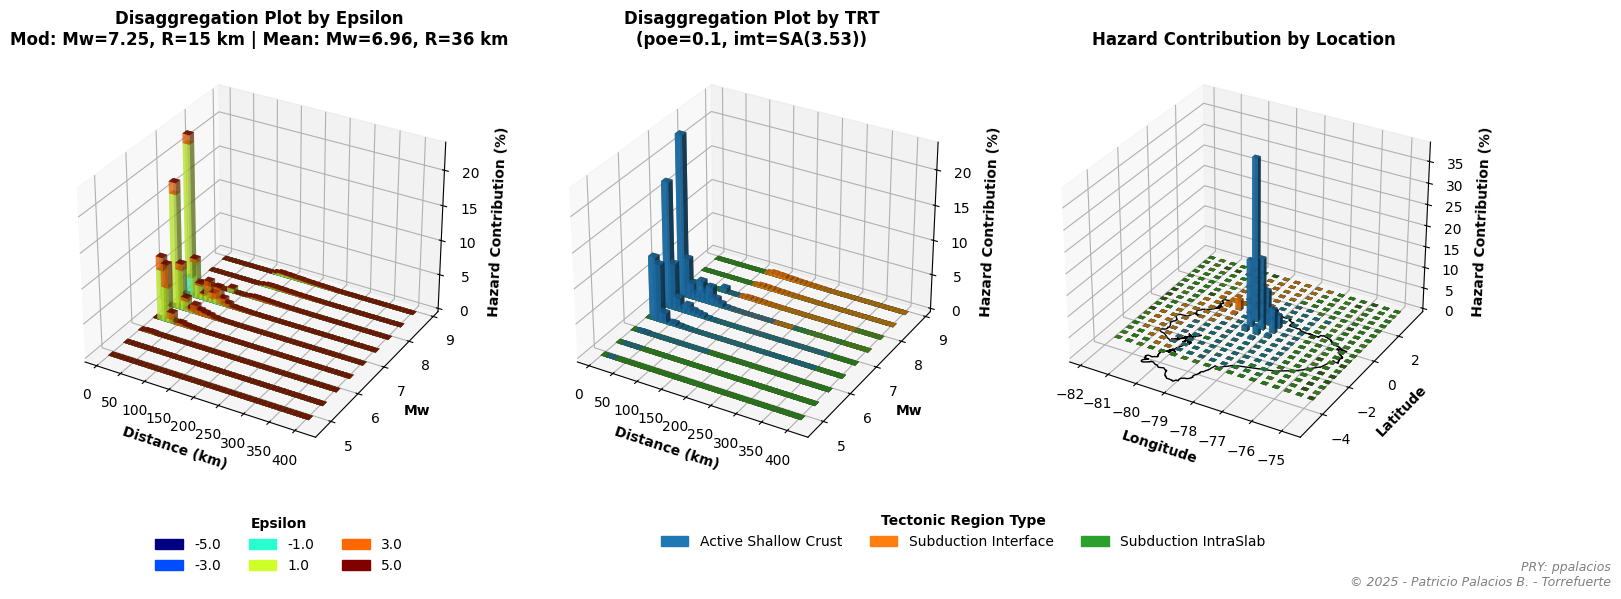

In [12]:

base_path = r'C:\Users\ppala\OneDrive\01. Brain\01. Consultorias\054. US Qondesa V2\11. AmenzaSísmica\100. data\diss'
shp_path_ecuador = r'P:\Mapas\00. Ecuador\bnd\EcuadorBoundary.shp'


target_poe=0.1
target_imt='SA(3.53)'

Disaggregation(shp_path_ecuador, 
               base_path, 
               target_poe, 
               target_imt,
               PRY='ppalacios',
               save_path = os.path.join(SVG_path, "DISS") ,
               )

## Maps

In [ ]:
from IPython.display import display
from OpenQuakeUHS.tools.map_utils import plot_uhs_location_map

# Asumiendo que ya tienes instanciado un objeto `uhs` de tipo `UHSSpectrum`
mapa = plot_uhs_location_map(lat=uhs.latitude, lon=uhs.longitude)
display(mapa)

print(uhs.latitude , uhs.longitude)
